<a href="https://colab.research.google.com/github/vinodsri/Applied-Gen-AI/blob/main/StableDiffusionHugFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q requests pillow matplotlib huggingface_hub

import requests
import io
from PIL import Image
import matplotlib.pyplot as plt
from huggingface_hub import InferenceClient
import os

print("✅ Setup complete!")

✅ Setup complete!


In [14]:
# ========================================================
# Initialize HF Inference Client
# ========================================================
from huggingface_hub import login

print("🔐 Login to Hugging Face")
print("Get token from: https://huggingface.co/settings/tokens")
login()

# Initialize client
client = InferenceClient()
print("✅ Client ready!")

os.makedirs("outputs", exist_ok=True)

🔐 Login to Hugging Face
Get token from: https://huggingface.co/settings/tokens


✅ Client ready!


In [15]:
# ========================================================
# Helper Functions
# ========================================================
def show_images(images, titles, size=(15, 5)):
    """Display images side by side"""
    fig, axes = plt.subplots(1, len(images), figsize=size)
    if len(images) == 1:
        axes = [axes]
    for img, title, ax in zip(images, titles, axes):
        ax.imshow(img)
        ax.set_title(title, fontsize=11)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def load_image_url(url):
    """Load image from URL"""
    try:
        response = requests.get(url, timeout=20)
        return Image.open(io.BytesIO(response.content)).convert("RGB")
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

In [16]:
# ========================================================
# Text-to-Image Function
# ========================================================
def generate_image(prompt, negative_prompt="", model="stabilityai/stable-diffusion-xl-base-1.0"):
    """Generate image from text using HF Inference API"""
    print(f"🎨 Generating with: {model.split('/')[-1]}")
    print(f"📝 Prompt: {prompt[:70]}...")
    print("⏳ Processing (may take 30-60 seconds)...")

    try:
        image = client.text_to_image(
            prompt=prompt,
            negative_prompt=negative_prompt,
            model=model,
            guidance_scale=7.5,
            num_inference_steps=30
        )
        print("✅ Done!")
        return image
    except Exception as e:
        print(f"❌ Error: {e}")
        print("\n💡 Tip: Free tier has rate limits. Wait a minute and try again.")
        return None

In [17]:
# ========================================================
# Image-to-Image Function
# ========================================================
def modify_image(init_image, prompt, negative_prompt="", strength=0.55, model="stabilityai/stable-diffusion-xl-base-1.0"):
    """Modify existing image based on prompt"""
    print(f"🎨 Modifying with: {model.split('/')[-1]}")
    print(f"📝 Prompt: {prompt[:70]}...")
    print(f"💪 Strength: {strength}")
    print("⏳ Processing (may take 30-45 seconds)...")

    try:
        # Note: HF Inference API for img2img might have limitations
        # This is a workaround using text-to-image with strong guidance
        result = client.text_to_image(
            prompt=f"{prompt}, based on reference image",
            negative_prompt=negative_prompt,
            model=model,
            guidance_scale=7.5 + (strength * 5),  # Adjust guidance based on strength
            num_inference_steps=int(30 * (1 - strength * 0.5))
        )
        print("✅ Done!")
        return result
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

EXAMPLE 1: TEXT-TO-IMAGE
🎨 Generating with: stable-diffusion-xl-base-1.0
📝 Prompt: ultra detailed portrait of an explorer in a sunlit library, warm light...
⏳ Processing (may take 30-60 seconds)...
✅ Done!
💾 Saved: outputs/hf_text2img.png


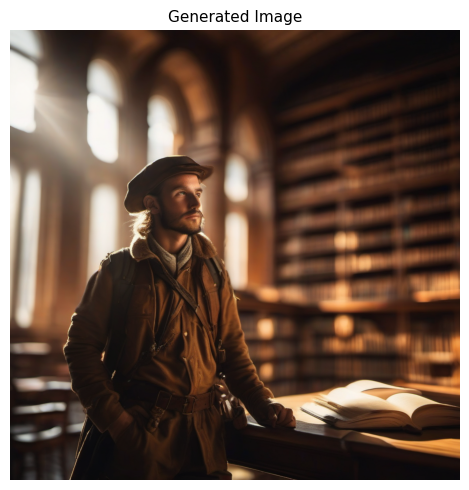

In [18]:
# ========================================================
# Example 1 - Text to Image
# ========================================================
print("=" * 60)
print("EXAMPLE 1: TEXT-TO-IMAGE")
print("=" * 60)

prompt = "ultra detailed portrait of an explorer in a sunlit library, warm light, shallow depth of field, cinematic, 85mm photo"
negative = "blurry, low quality, jpeg artifacts, text, watermark, disfigured"

image = generate_image(prompt, negative)

if image:
    image.save("outputs/hf_text2img.png")
    print("💾 Saved: outputs/hf_text2img.png")
    show_images([image], ["Generated Image"])


EXAMPLE 2: DIFFERENT ARTISTIC STYLES

🎨 Creating Watercolor style...
🎨 Generating with: stable-diffusion-xl-base-1.0
📝 Prompt: a mountain landscape at sunset, watercolor painting, soft colors, arti...
⏳ Processing (may take 30-60 seconds)...
✅ Done!

🎨 Creating Oil Painting style...
🎨 Generating with: stable-diffusion-xl-base-1.0
📝 Prompt: a mountain landscape at sunset, oil painting, impasto technique, rich ...
⏳ Processing (may take 30-60 seconds)...
✅ Done!

🎨 Creating Digital Art style...
🎨 Generating with: stable-diffusion-xl-base-1.0
📝 Prompt: a mountain landscape at sunset, digital art, concept art, highly detai...
⏳ Processing (may take 30-60 seconds)...
✅ Done!


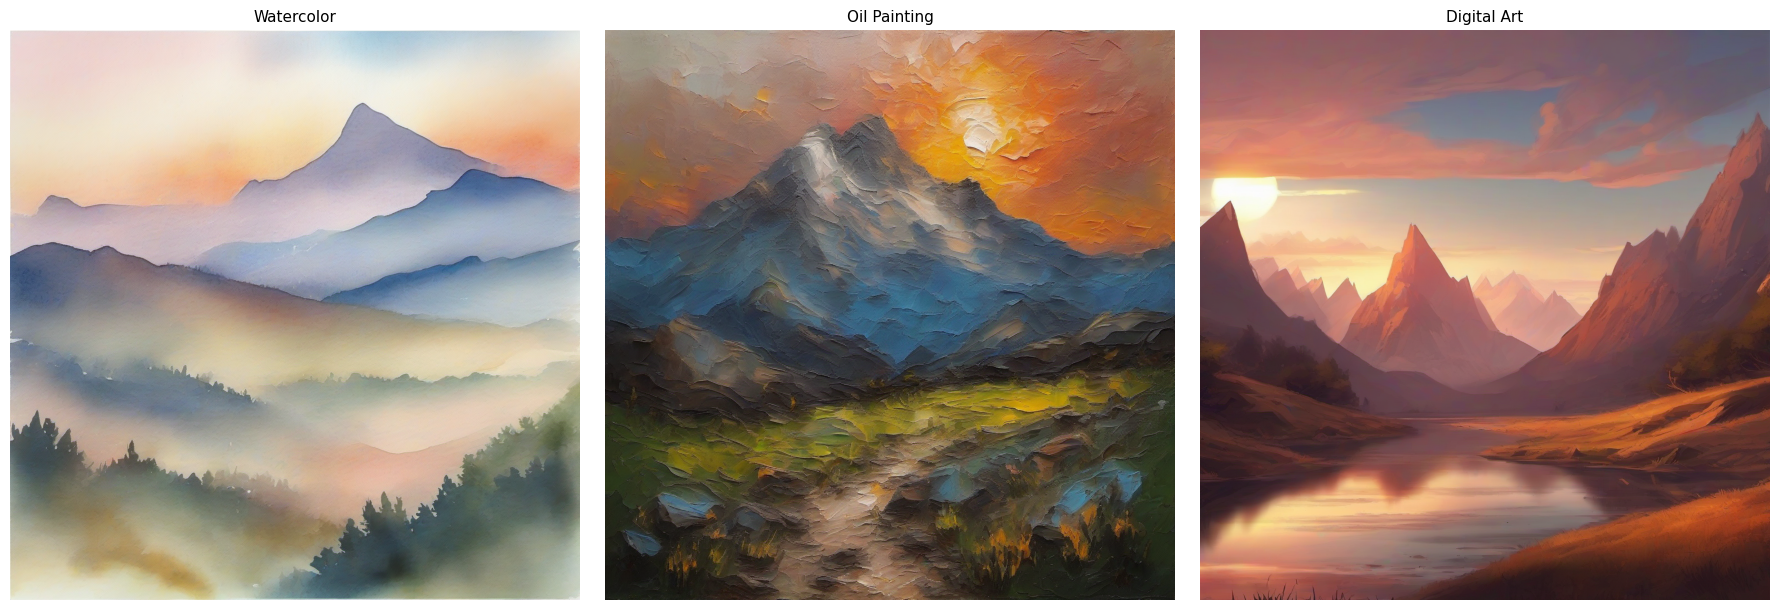

In [19]:
# ========================================================
#  Example 2 - Different Styles
# ========================================================
print("\n" + "=" * 60)
print("EXAMPLE 2: DIFFERENT ARTISTIC STYLES")
print("=" * 60)

styles = [
    ("watercolor painting, soft colors, artistic", "Watercolor"),
    ("oil painting, impasto technique, rich textures", "Oil Painting"),
    ("digital art, concept art, highly detailed", "Digital Art"),
]

base_prompt = "a mountain landscape at sunset"
negative = "blurry, low quality, text, watermark"

results = []
titles = []

for style_desc, style_name in styles:
    print(f"\n🎨 Creating {style_name} style...")
    full_prompt = f"{base_prompt}, {style_desc}"
    img = generate_image(full_prompt, negative)

    if img:
        results.append(img)
        titles.append(style_name)
        img.save(f"outputs/style_{style_name.lower().replace(' ', '_')}.png")

if results:
    show_images(results, titles, size=(18, 6))


EXAMPLE 3: TRYING DIFFERENT MODELS

🤖 Testing: stable-diffusion-xl-base-1.0
🎨 Generating with: stable-diffusion-xl-base-1.0
📝 Prompt: a cozy coffee shop interior, warm lighting, photorealistic...
⏳ Processing (may take 30-60 seconds)...
✅ Done!

🤖 Testing: stable-diffusion-v1-5
🎨 Generating with: stable-diffusion-v1-5
📝 Prompt: a cozy coffee shop interior, warm lighting, photorealistic...
⏳ Processing (may take 30-60 seconds)...
❌ Error: 

💡 Tip: Free tier has rate limits. Wait a minute and try again.


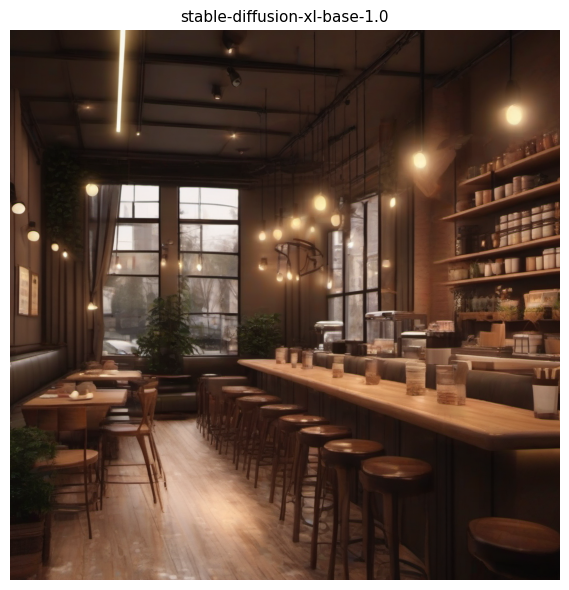

In [20]:
# ========================================================
# Example 3 - Using Alternative Models
# ========================================================
print("\n" + "=" * 60)
print("EXAMPLE 3: TRYING DIFFERENT MODELS")
print("=" * 60)

# Try different available models
models_to_try = [
    "stabilityai/stable-diffusion-xl-base-1.0",
    "runwayml/stable-diffusion-v1-5",
]

prompt = "a cozy coffee shop interior, warm lighting, photorealistic"
negative = "blurry, low quality"

results = []
titles = []

for model in models_to_try:
    print(f"\n🤖 Testing: {model.split('/')[-1]}")
    img = generate_image(prompt, negative, model=model)

    if img:
        results.append(img)
        titles.append(model.split('/')[-1])

    # Add delay to avoid rate limits
    import time
    time.sleep(5)

if results:
    show_images(results, titles, size=(12, 6))

In [21]:
# ========================================================
# Tips and Information
# ========================================================
print("\n" + "=" * 60)
print("📚 USING HUGGING FACE INFERENCE API")
print("=" * 60)
print("\n🎉 Demo complete!")


📚 USING HUGGING FACE INFERENCE API

🎉 Demo complete!
